# Onedrivedownloader Test

This notebook tests using the `onedrivedownloader` package to download shared OneDrive files and then tests using `nibabel` to display the NIfTI files (`xxx.ni.gz`)

## 1. Installation and imports

In [1]:
!pip install onedrivedownloader nibabel

In [5]:
import os

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# working_dir = '/content/drive/My Drive/Capstone/BioCV_Su23/src'
working_dir = '/content/drive/MyDrive/capstone/BioCV_Su23_Copy/src'

os.chdir(working_dir)

Mounted at /content/drive


In [27]:
import matplotlib.pyplot as plt
import numpy as np


#******** TODO: DELETE this part when modules are finalized *********#
# Re-run this section to force reload of modules when they're being updated on the fly
import importlib
import utils.mri_common as mri_common
import utils.data_handler as dh
import utils.mri_plotter as mriplt

importlib.reload(mri_common)
importlib.reload(dh)
importlib.reload(mriplt)
#******************************************************************#
# Custom modules
import utils.mri_common as mri_common
from utils.data_handler import DataHandler, StructuralScan, MriType
from utils.mri_plotter import MRIPlotter


## 2. Download images

In [36]:
#####################################################################
# THIS IS ONLY NEEDED IF YOU WANT TO UNZIP EACH OF THE NII FILES ...
# HOWEVER THIS IS UNNECESSARY AS NIBABEL CAN WORK WITH THEM DIRECTLY
#####################################################################

# import gzip
# import shutil

# # unzip the contents inside images_segm
# data_dir = "data/GBM dataset"
# target_dir = "images_segm"

# # get a list of zipped files
# zipped_files = os.listdir(data_dir + '/' + target_dir)

# # iterate over the list and unzip the archives, writing them back out to disk
# # https://stackoverflow.com/a/44712152
# for file in zipped_files:
#     file_path = data_dir + '/' + target_dir + '/' + file
#     with gzip.open(file_path, mode="rb") as archive:
#         with open(file_path.split(".gz")[0], mode="wb") as f_out:
#             shutil.copyfileobj(archive, f_out)

## 5. Nibabel visualization tests

In [35]:
data_handler = DataHandler()

In [13]:
# get a listing of the files
struct_files = data_handler.list_mri_in_dir(mri_type=MriType.STRUCT_SCAN)
segm_files = data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED)
auto_segm_files = data_handler.list_mri_in_dir(mri_type=MriType.AUTO_SEGMENTED)

reduced_files = data_handler.list_mri_in_dir(mri_type=MriType.STRUCT_SCAN_REDUCED)
segm_reduced_files = data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED_REDUCED)
auto_segm_reduced_files =  data_handler.list_mri_in_dir(mri_type=MriType.AUTO_SEGMENTED_REDUCED)

In [14]:
print(f"Number of structural images: {len(struct_files)}")
print(f"Number of manually-revised images: {len(segm_files)}")
print(f"Number of auto-segmented images: {len(auto_segm_files)}")

print(f"Number of reduced structural images: {len(reduced_files)}")
print(f"Number of reduced manually-revised images: {len(segm_reduced_files)}")
print(f"Number of reduced auto-segmented images: {len(auto_segm_reduced_files)}")

Number of structural images: 671
Number of manually-revised images: 147
Number of auto-segmented images: 611
Number of reduced structural images: 735
Number of reduced manually-revised images: 735
Number of reduced auto-segmented images: 147


In [15]:
print(f"Number of structural images: {len(struct_files)}")
# confirm that we can map between segmentation labels and structural images
# collect every segm file name in segm_files if it is in struct files and
# compare the length of the resulting list with the length of segm_files
# expect true
print((len([img for img in segm_files if img.split("_segm")[0] in struct_files])
 == len(segm_files)))

Number of structural images: 671
True


### Plotting examples

In [17]:
mri_plt = MRIPlotter()

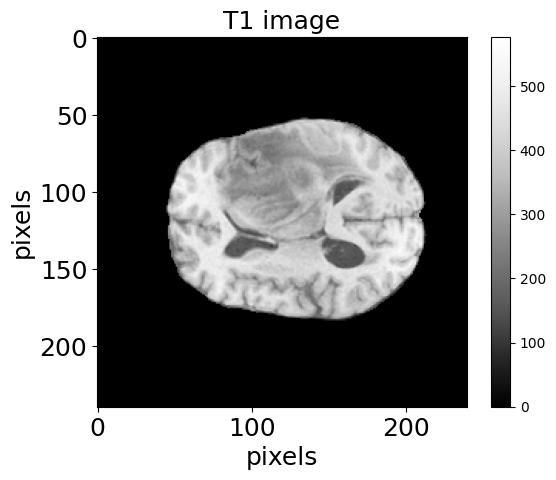

In [29]:
# Plot 1 img
fig, axs = plt.subplots()
t1_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.T1)

mri_plt.plot_struct_img(img_data=t1_img, fig=fig, axs=axs, row=0, col=1,
                        title="T1 image")

plt.show()

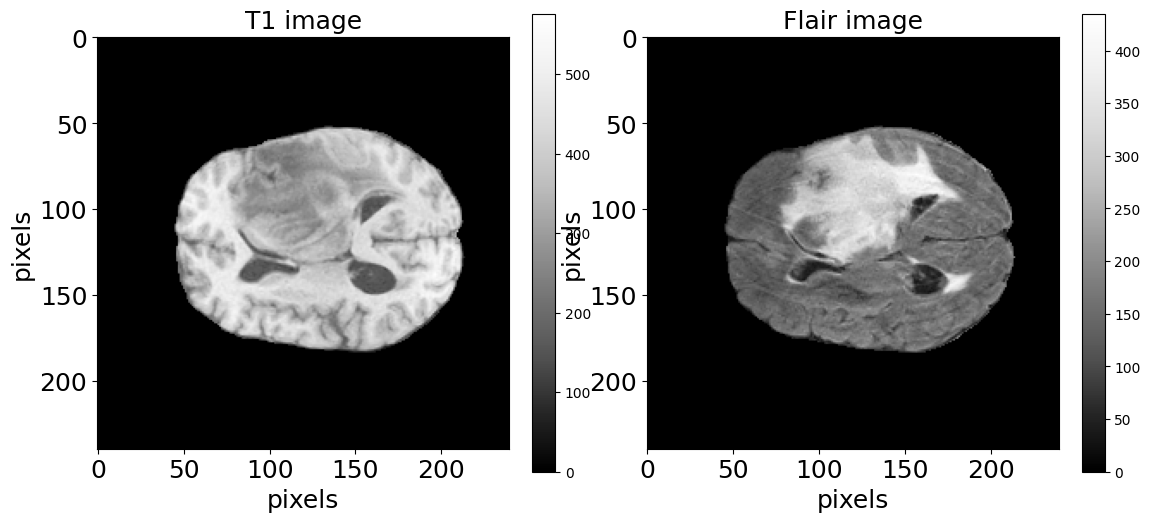

In [30]:
# TEST: Plot 1 row and 2 cols
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 10))
t1_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.T1)
flair_img = data_handler.load_mri(subj_id="UPENN-GBM-00002",
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=StructuralScan.FLAIR)


mri_plt.plot_struct_img(img_data=t1_img, fig=fig, axs=axs, row=0, col=0,
                        title="T1 image")

mri_plt.plot_struct_img(img_data=flair_img, fig=fig, axs=axs, row=0, col=1,
                        title="Flair image")

plt.show()

### 5.a. Plot the structural and segmented images and their corresponding reduced versions

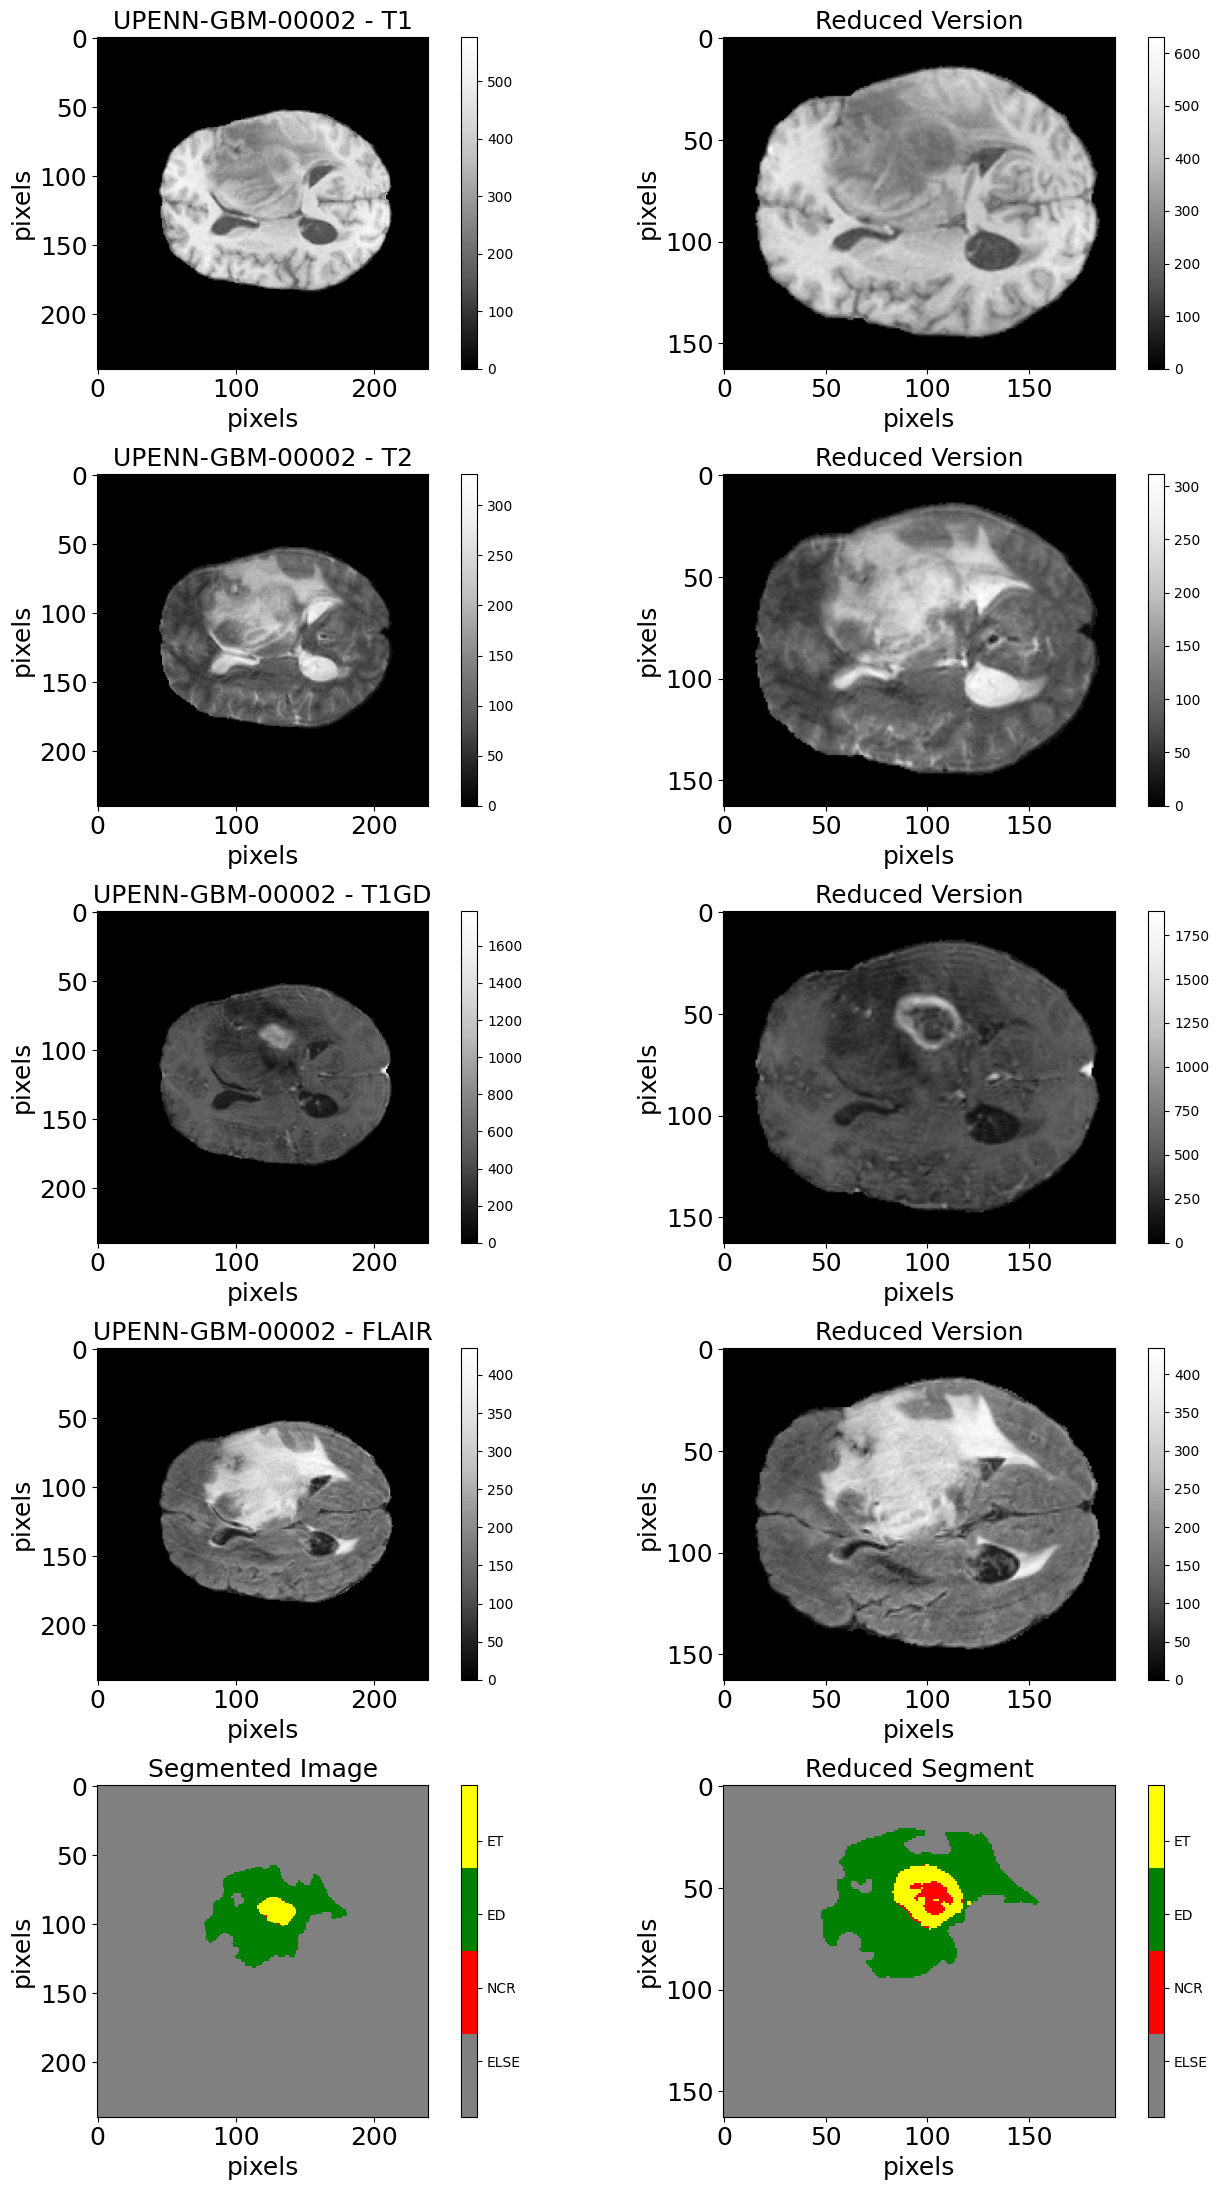

In [37]:
subj_file = segm_files[0].split("_")[0]

# plot struct and corresponding reduced images
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")

# finally, add the segmentation label at the last row
# a. plot the segmented image
segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED)
mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=4, col=0, title="Segmented Image")

# b. plot the reduced version of the segmented image
reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=4, col=1,
                      title="Reduced Segment")

# show the figure
plt.tight_layout()
plt.show()

In [38]:
# Check labels
print("segmentation labels", np.unique(segm_img))
print("reduced segmentation labels",  np.unique(reduced_segm_img))

segmentation labels [0 1 2 4]
reduced segmentation labels [0 1 2 4]


### 5.b. Plot the segments as overlay to the structural images

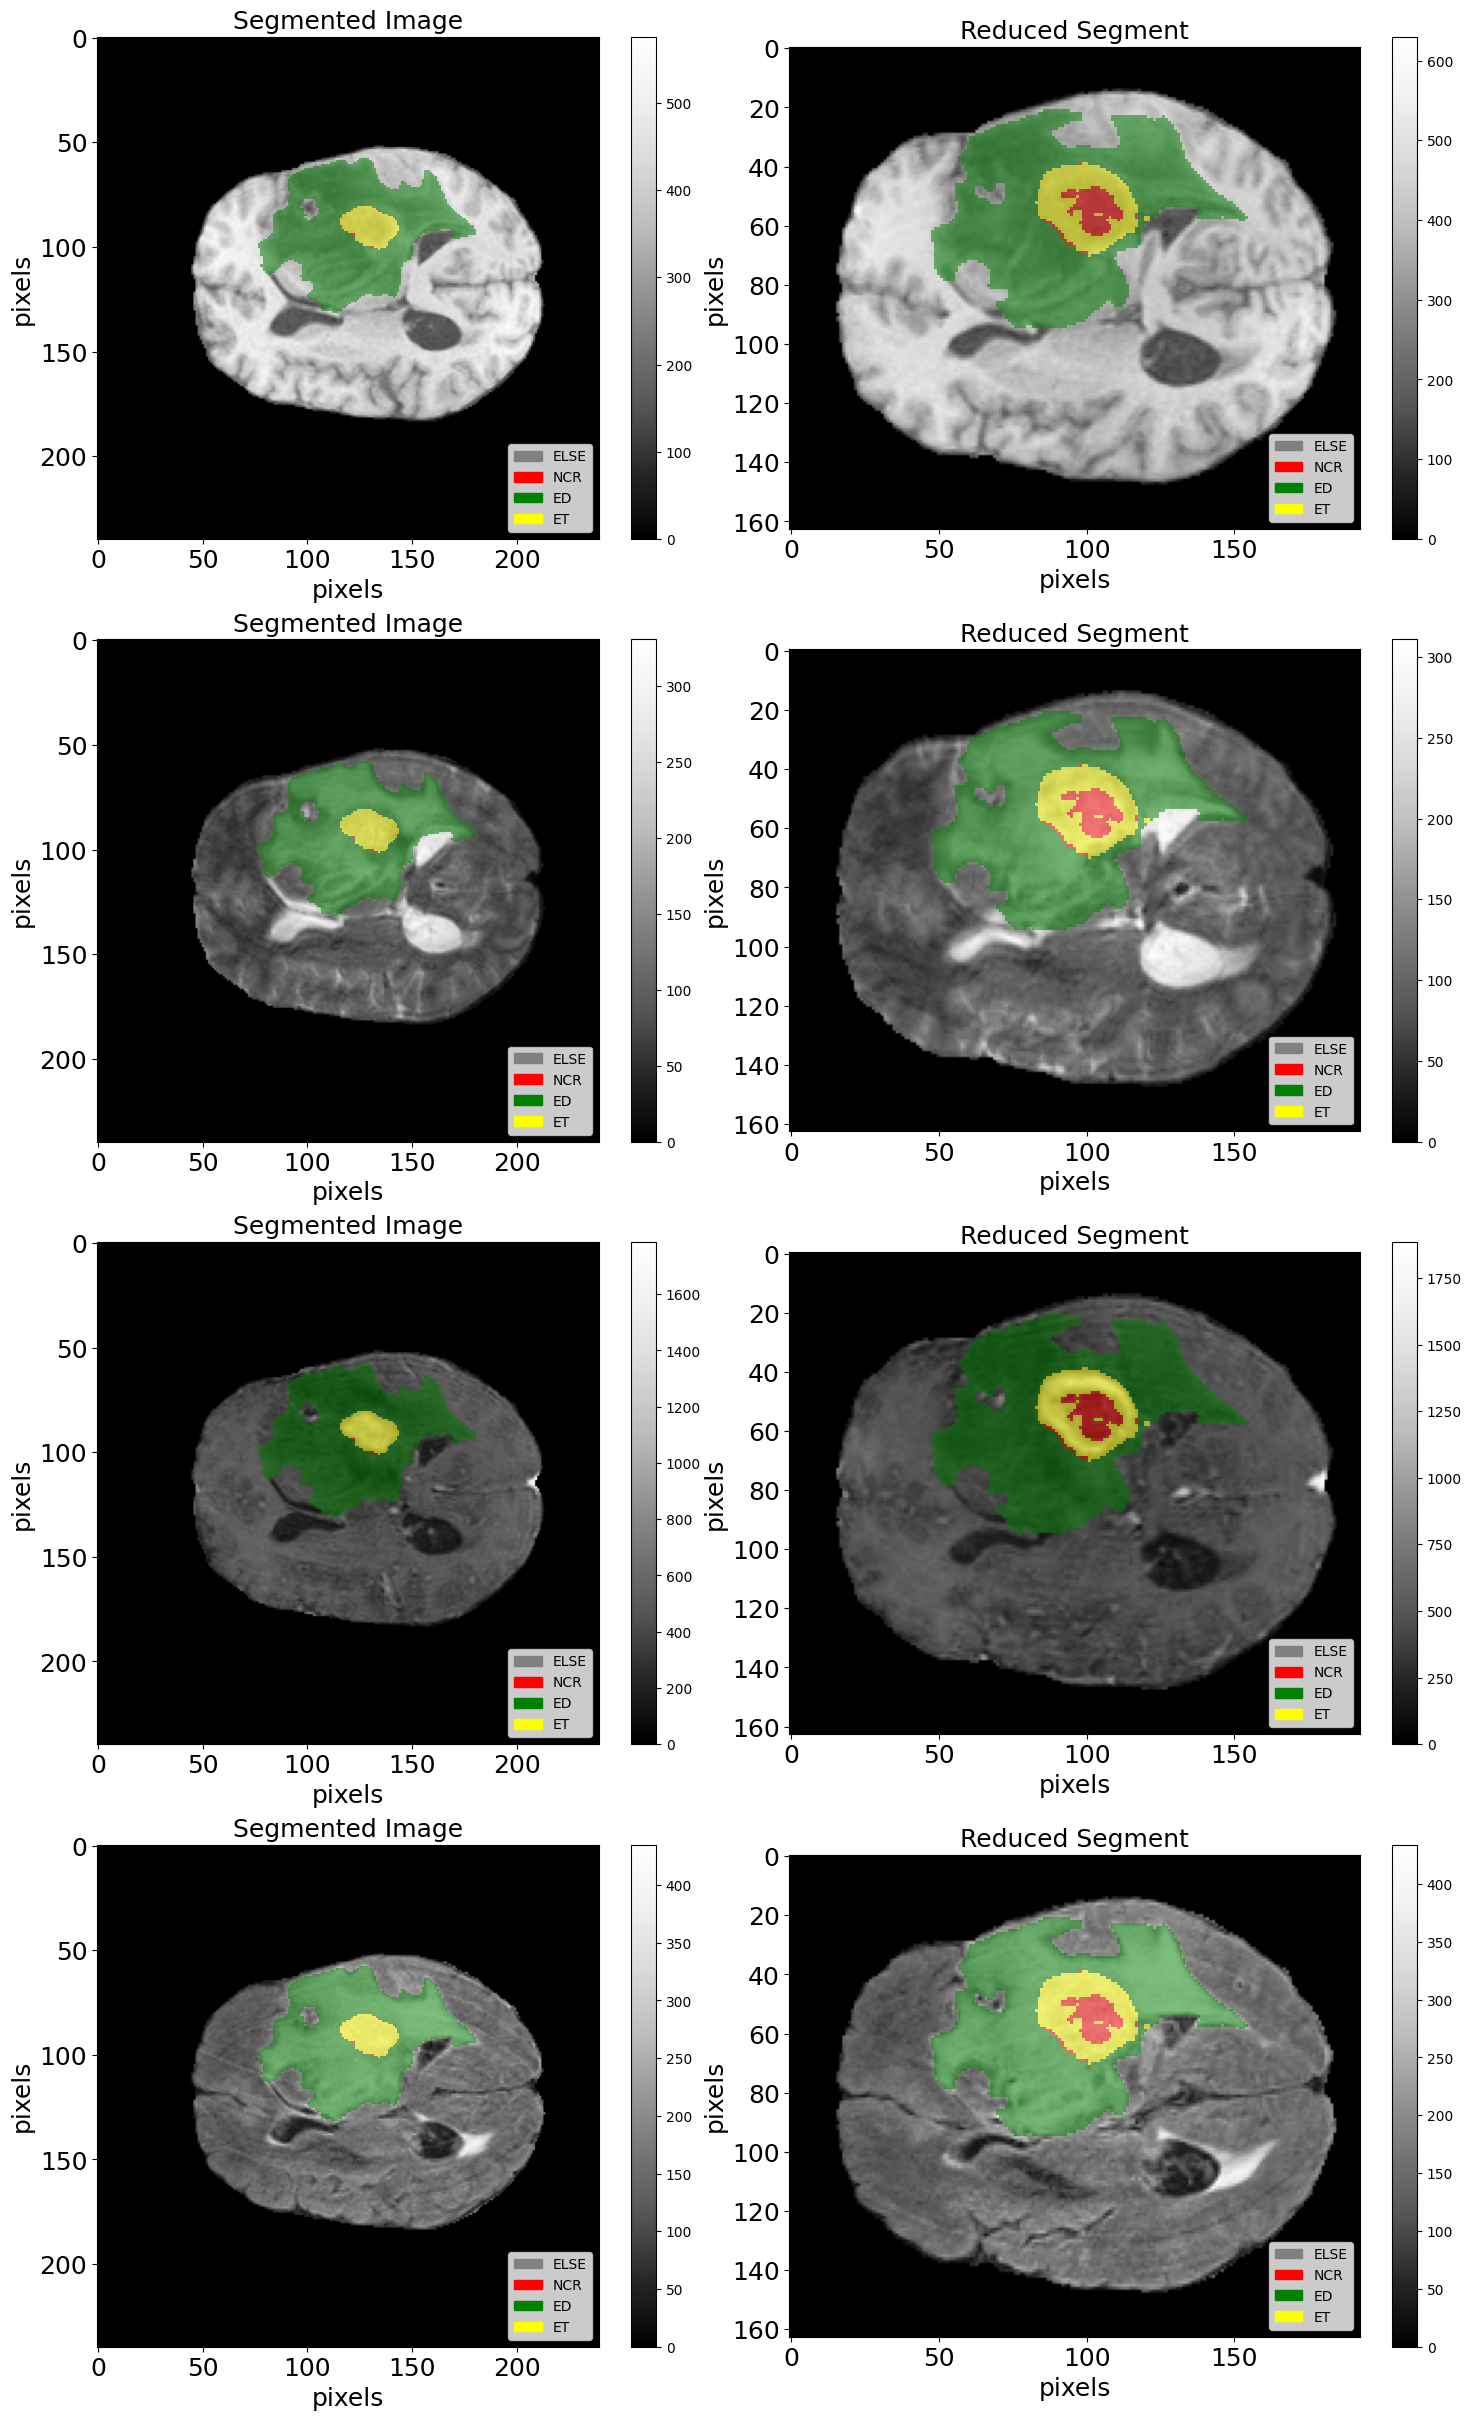

In [44]:
# extract the subject scan for the first manually-revised segmentation label e.g. UPENN-GBM-00002_11
subj_file = segm_files[0].split("_")[0]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 30))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # overlay segments on first column
    segm_img = data_handler.load_mri(subj_id=subj_file,
                                    mri_type=MriType.AUTO_SEGMENTED)
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=0,
                          overlay=True, use_legend=True, title="Segmented Image")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)
    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")


    # overlay reduced segments on second column
    reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=row, col=1,
                      overlay=True, use_legend=True, title="Reduced Segment")



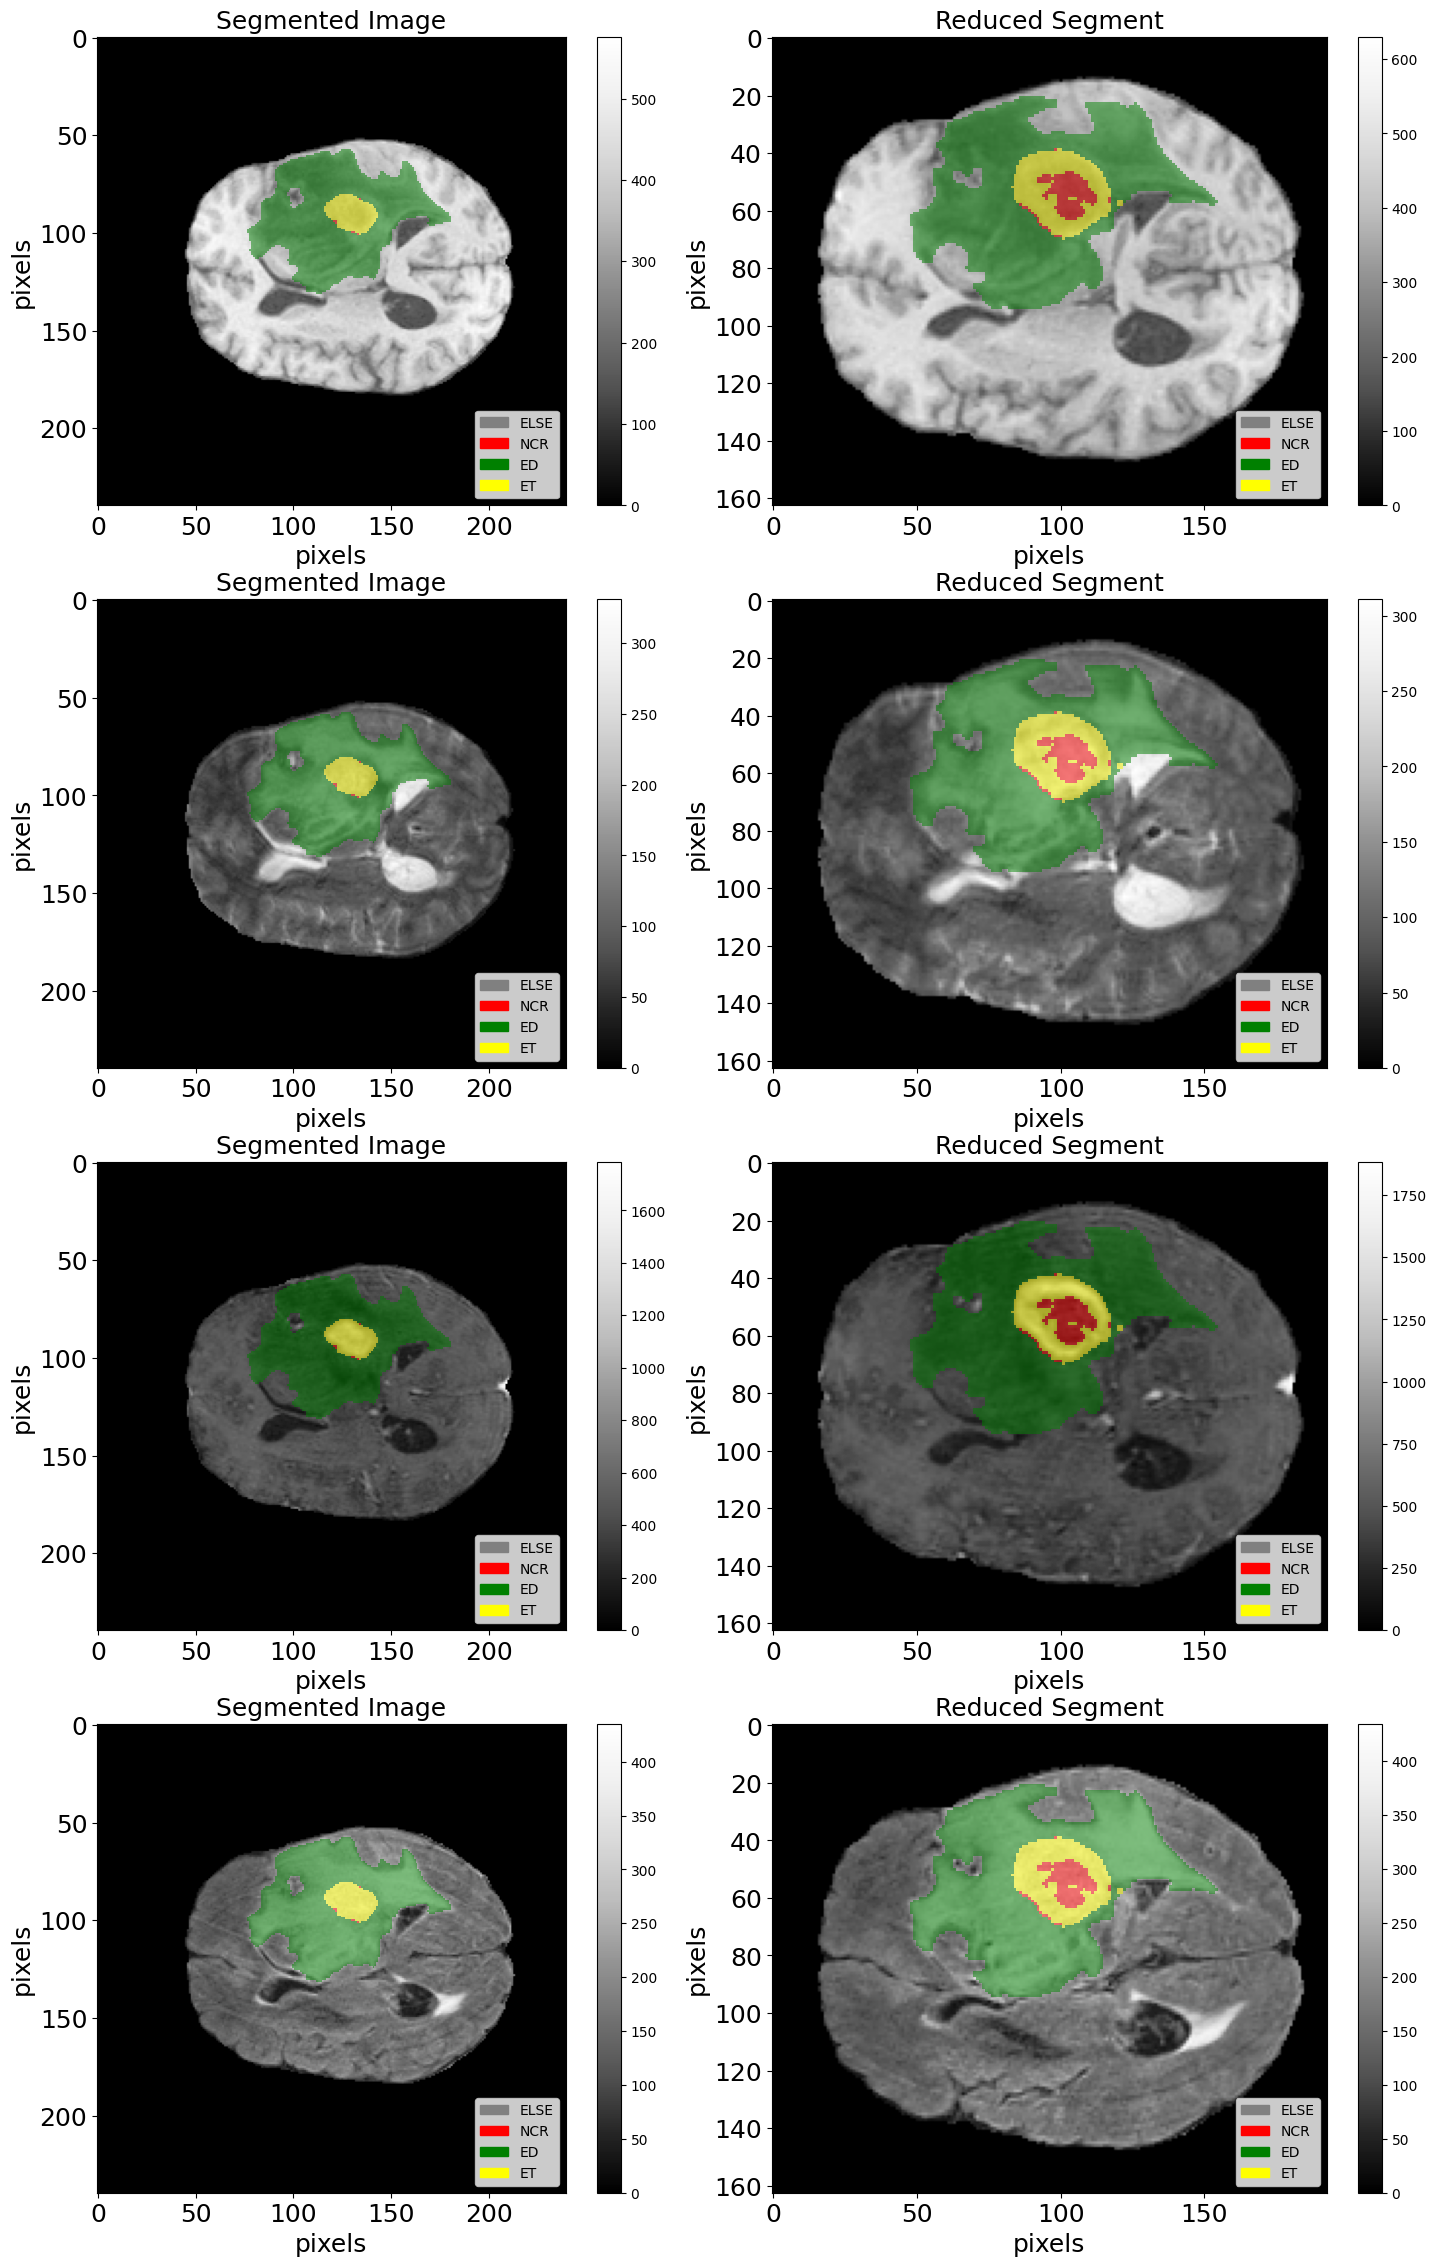

In [52]:
# plot image 2
subj_file = segm_files[0].split("_")[0]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 28))

# plot each structural scan image
for row, struct_scan in enumerate(StructuralScan):

    # load and plot structural images on the first column
    struct_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN,
                                struct_scan=struct_scan)

    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} - {struct_scan}")

    # overlay segments on first column
    segm_img = data_handler.load_mri(subj_id=subj_file,
                                    mri_type=MriType.AUTO_SEGMENTED)
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=0,
                          overlay=True, use_legend=True, title="Segmented Image")

    # load and plot corresponding reduced images on the second column
    reduced_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.STRUCT_SCAN_REDUCED,
                                struct_scan=struct_scan)
    mri_plt.plot_struct_img(img_data=reduced_img, fig=fig, axs=axs, row=row, col=1, title="Reduced Version")


    # overlay reduced segments on second column
    reduced_segm_img = data_handler.load_mri(subj_id=subj_file,
                                mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=reduced_segm_img, fig=fig, axs=axs, row=row, col=1,
                      overlay=True, use_legend=True, title="Reduced Segment")



### 5.c. Plot the first 5 annotated and auto labelled images side by side

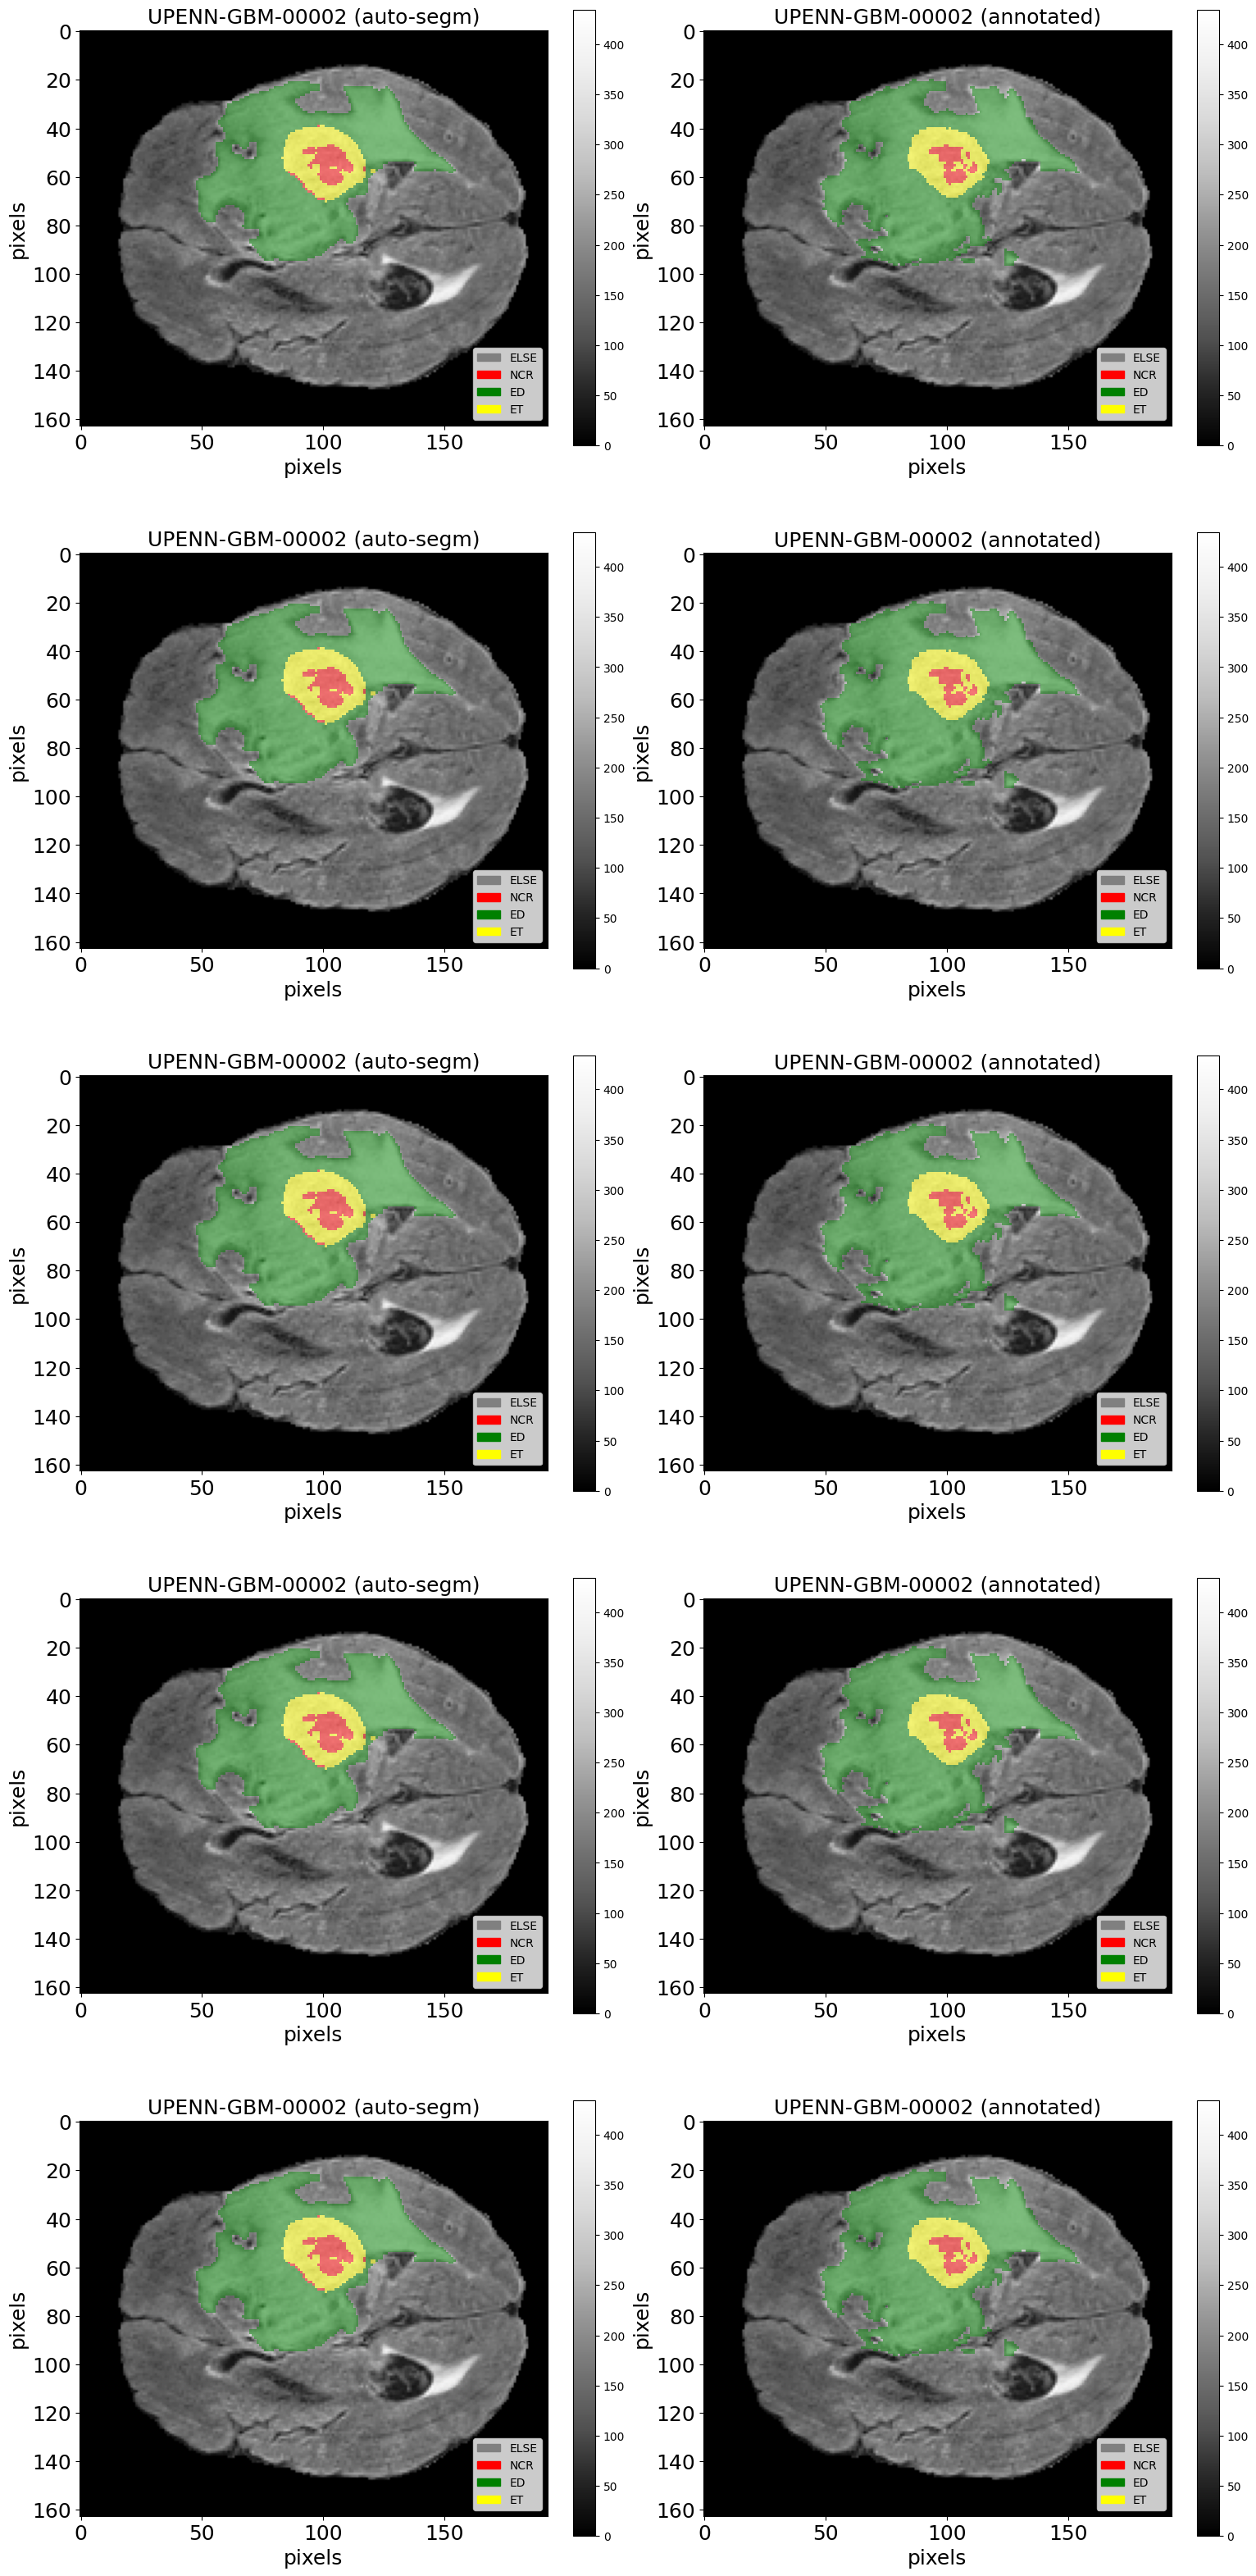

In [53]:
# load first 5 images
num_images = 5
fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(18, 8*num_images))
for row in range(num_images):

    subj_file = segm_files[0].split("_")[0]

    # Plot the base image (reduced version) on both columns. Hardcode FLAIR as base image for now
    struct_reduced = data_handler.load_mri(subj_id=subj_file,
                            mri_type=MriType.STRUCT_SCAN_REDUCED,
                            struct_scan=StructuralScan.FLAIR)

    for col in range(2):
        mri_plt.plot_struct_img(img_data=struct_reduced, fig=fig, axs=axs, row=row, col=col)

    # plot auto labelled (reduced) on first column
    auto_segm = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.AUTO_SEGMENTED_REDUCED)
    mri_plt.plot_segm_img(img_data=auto_segm, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} (auto-segm)",
                          overlay=True, use_legend=True)


    # plot manually annotated (reduced) on second column
    segm = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.ANNOTATED_REDUCED)
    mri_plt.plot_segm_img(img_data=segm, fig=fig, axs=axs, row=row, col=1, title=f"{subj_file} (annotated)",
                          overlay=True, use_legend=True)

## 6. visualize multiple samples at location with largest tumor spread

Working on sample No. 0 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 1 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 2 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 3 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 4 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 5 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 6 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 7 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 8 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 9 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 10 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 11 display slide No. 68  with  4973 non-zero pixels in label.
Wo

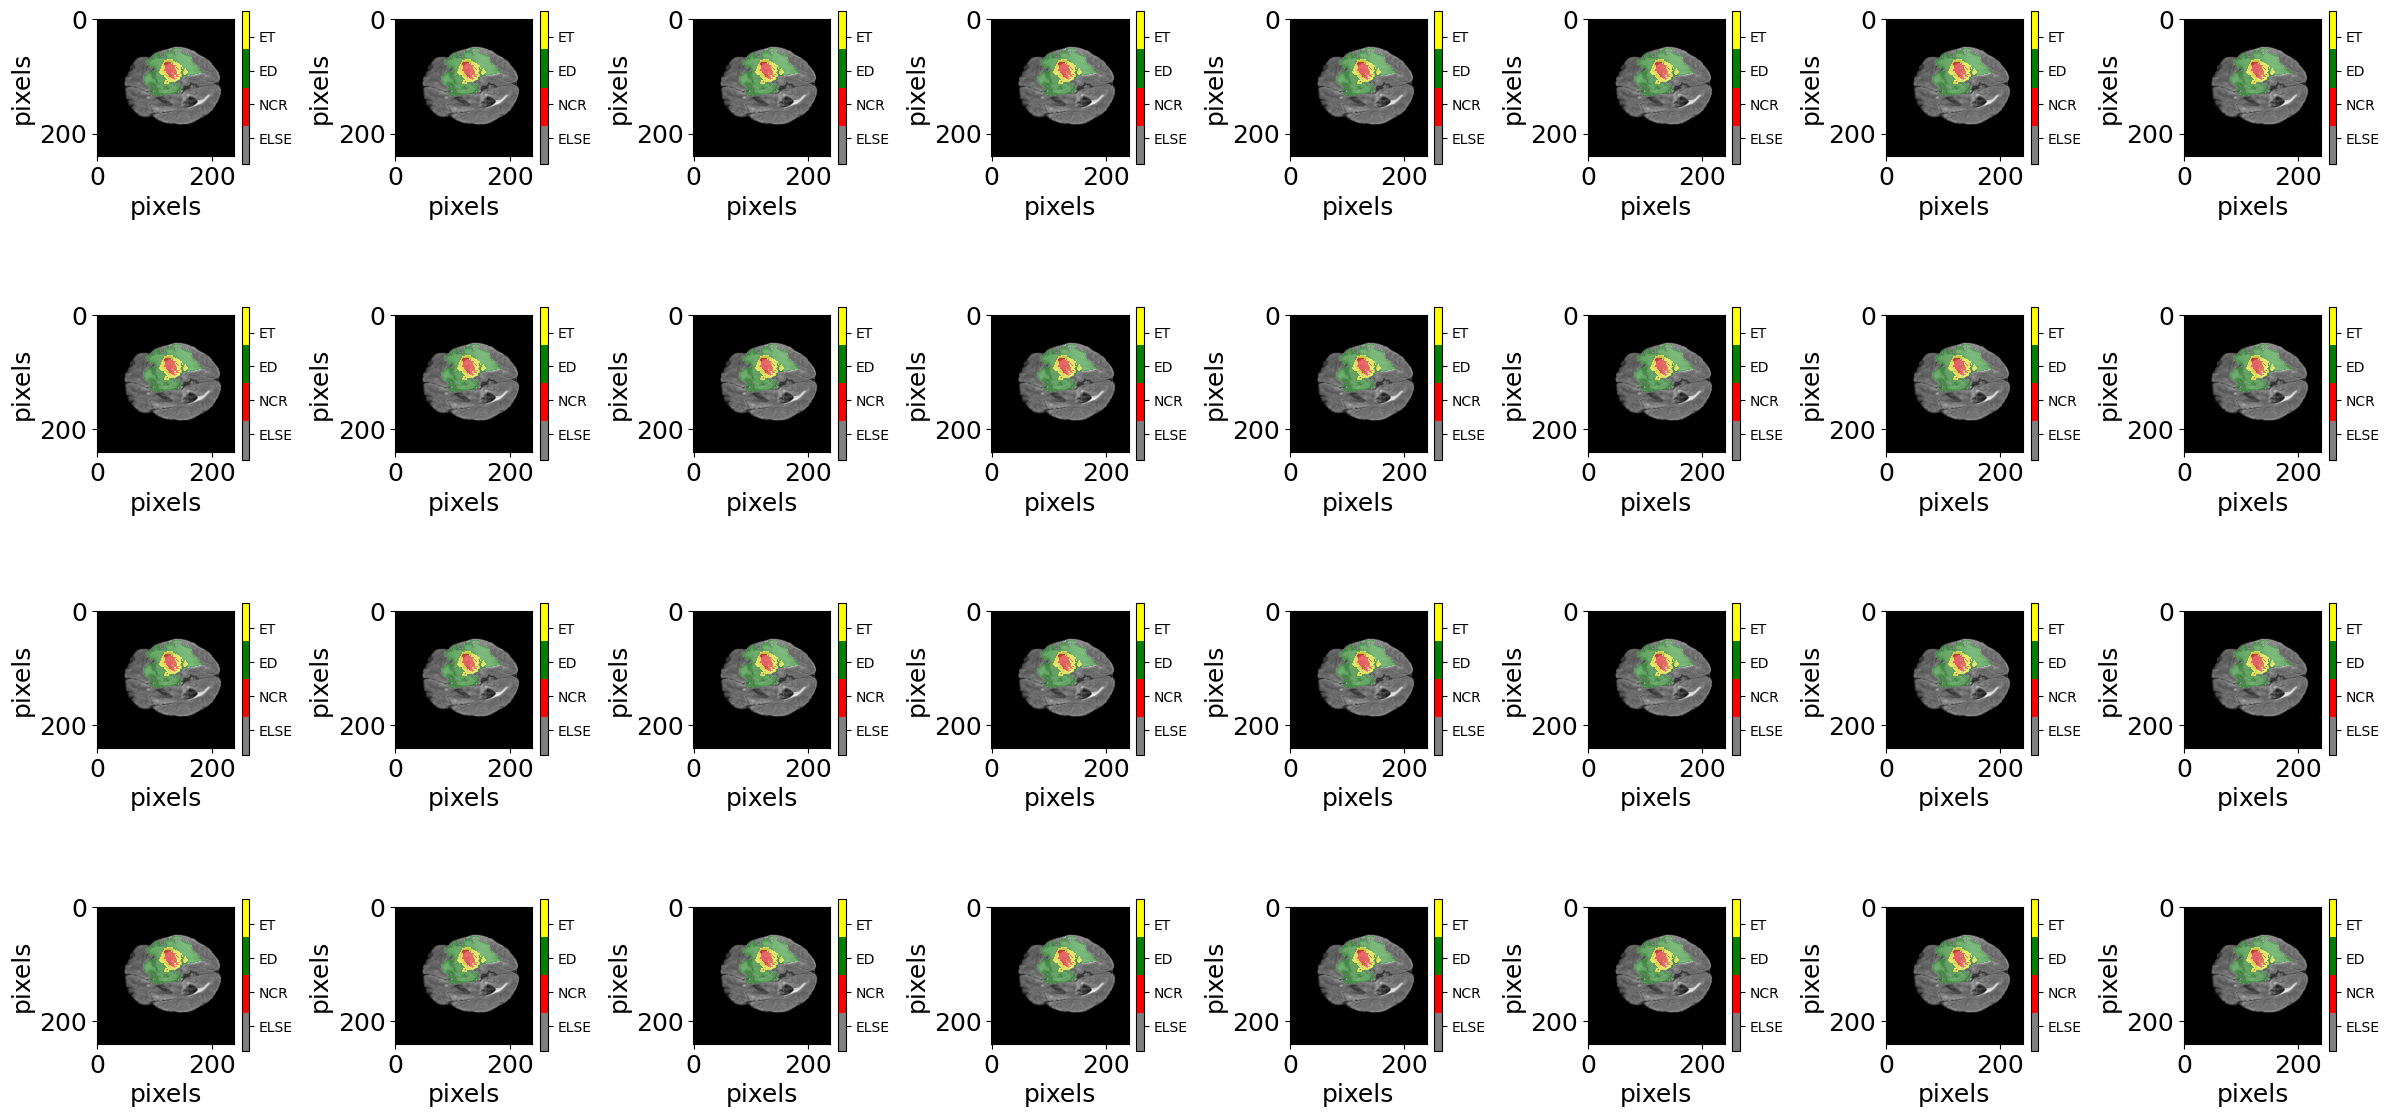

In [54]:
# visualize the structural images and its corresponding manually-revised segmentation label for starters
# set the number of plots per row and column
# Warning: needs high-RAM machine to run all (e.g. >80) plots
# nrows = 19
nrows = 4
ncols = 8

# set a constant color scale for all structure images
img_max = 1000
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))

# iteratively load the file structural images and display them
for idx in range(nrows*ncols):

    # go until no more samples
    if idx >= len(segm_files):
        break

    # determine which row/col to plot the current axs
    row = idx // ncols
    col = idx % ncols

    # extract the subject scan for the first manually-revised segmentation label
    subj_file = segm_files[0].split("_")[0]

    # load the images
    struct_img = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN, struct_scan=StructuralScan.FLAIR)
    segm_img = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.ANNOTATED)

    # calculate slice idx
    slice_idx, nonzero_count = mri_common.get_largest_tumor_slice_idx(segm_img)
    print("Working on sample No.", idx, "display slide No.", slice_idx, " with ",
          nonzero_count, "non-zero pixels in label.")

    # plot the base image (reduced version) on both columns. Hardcode FLAIR as base image for now
    mri_plt.plot_struct_img(img_data=struct_img, fig=fig, axs=axs, row=row, col=col, colorbar=False, slice_idx=slice_idx)

    # plot manually annotated (reduced) as overlay
    mri_plt.plot_segm_img(img_data=segm_img, fig=fig, axs=axs, row=row, col=col, overlay=True, segm_colorbar=True, slice_idx=slice_idx)

# show the figure
plt.tight_layout()
plt.show()
# fig.savefig('example_all_sample.pdf', format='pdf')


## 7. zero data removal QC

In [57]:
# find the shape of image and number of samples

# find dimensions
subj_file = segm_files[0].split("_")[0]

img_data = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN, struct_scan=StructuralScan.FLAIR)

img_data.shape
n0 = img_data.shape[0]
n1 = img_data.shape[1]
n2 = img_data.shape[2]
nsamp = len(segm_files)

### initialize
all_zero_a0 = np.zeros( (n0, nsamp) )
all_zero_a1 = np.zeros( (n1, nsamp) )
all_zero_a2 = np.zeros( (n2, nsamp) )

a0_min_idx = n0
a0_max_idx = 0
a1_min_idx = n1
a1_max_idx = 0
a2_min_idx = n2
a2_max_idx = 0

# find non-zero slides
for struct_scan in StructuralScan:
    for idx in range(nsamp):
        # get the current image
        # extract the subject scan for the first manually-revised segmentation label
        subj_file = segm_files[0].split("_")[0]

        img_data = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN, struct_scan=struct_scan.value)

        # find all zero lines in each of the 3 dimensions
        all_zero_a01 = np.all(img_data == 0, axis=2)
        all_zero_a0[:,idx]  = np.all(all_zero_a01 == True, axis=1).astype(int)
        all_zero_a1[:,idx]  = np.all(all_zero_a01 == True, axis=0).astype(int)

        all_zero_a02 = np.all(img_data == 0, axis=1)
        all_zero_a2[:,idx]  = np.all(all_zero_a02 == True, axis=0).astype(int)

    # find all zero planes in each of the 3 dimensions
    a0_empty = np.all(all_zero_a0 == True, axis=1)
    a1_empty = np.all(all_zero_a1 == True, axis=1)
    a2_empty = np.all(all_zero_a2 == True, axis=1)

    # find new bound values
    a0_min_idx = np.min( (a0_min_idx, np.where(~a0_empty)[0].min()) )
    a0_max_idx = np.max( (a0_max_idx, np.where(~a0_empty)[0].max()) )
    a1_min_idx = np.min( (a1_min_idx, np.where(~a1_empty)[0].min()) )
    a1_max_idx = np.max( (a1_max_idx, np.where(~a1_empty)[0].max()) )
    a2_min_idx = np.min( (a2_min_idx, np.where(~a2_empty)[0].min()) )
    a2_max_idx = np.max( (a2_max_idx, np.where(~a2_empty)[0].max()) )

print("min idx in height is:",a0_min_idx,"max idx in height is:",a0_max_idx)
print("min idx in width is :",a1_min_idx,"max idx in width is :",a1_max_idx)
print("min idx in depth is :",a2_min_idx,"max idx in depth is :",a2_max_idx)

min idx in height is: 49 max idx in height is: 185
min idx in width is : 45 max idx in width is : 215
min idx in depth is : 0 max idx in depth is : 139


In [60]:
n0_new = a0_max_idx - a0_min_idx + 1
n1_new = a1_max_idx - a1_min_idx + 1
n2_new = a2_max_idx - a2_min_idx + 1
image_size_ratio = (a0_max_idx-a0_min_idx+1) * (a1_max_idx-a1_min_idx+1) * (a2_max_idx-a2_min_idx+1) / (n0 * n1 * n2)

print("Original height / width / depth :", n0, "/", n1, "/", n2)
print("     New height / width / depth :", n0_new, "/", n1_new, "/", n2_new)
print("Data reduction :", round((1-image_size_ratio)*100, 2), "%")

Original height / width / depth : 240 / 240 / 155
     New height / width / depth : 137 / 171 / 140
Data reduction : 63.26 %


## 8. function to reduce data and save structure MRI with annotations

In [61]:
# create a new folder, save all reduced data into the new folder
import nibabel as nib
DATA_DIR = "/content/data/reduced"
reduce_data_path = DATA_DIR + '/images_reduced'

if not os.path.exists(reduce_data_path):
  os.makedirs(reduce_data_path)

for idx in range(nsamp):
  # find folder name
  subj_file = segm_files[idx].split("_")[0]

  # working on structure files
  for struct_scan in StructuralScan:
      # obtain file name
      struct = struct_scan.value
      img_data, nifti = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN,
                                       struct_scan=struct_scan.value, return_nifti=True)
      # reduce data
      sliced_data = nifti.get_fdata()[a0_min_idx:a0_max_idx, a1_min_idx:a1_max_idx, a2_min_idx:a2_max_idx]
      sliced_nifti = nib.Nifti1Image(sliced_data, nifti.affine, nifti.header)

      # save reduced data
      # UPENN-GBM-00002_11_FLAIR.nii.gz
      save_fn = reduce_data_path + '/' + subj_file +"_" + struct + '_cut.nii'
      nib.save(sliced_nifti, save_fn)

  # working on segm files
  img_data, nifti = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.ANNOTATED, return_nifti=True)

  # reduce data
  sliced_data = nifti.get_fdata()[a0_min_idx:a0_max_idx, a1_min_idx:a1_max_idx, a2_min_idx:a2_max_idx]
  sliced_nifti = nib.Nifti1Image(sliced_data, nifti.affine, nifti.header)

  # save reduced data
  save_fn = reduce_data_path + '/' + subj_file +"_" + struct + '_segm_cut.nii'
  nib.save(sliced_nifti, save_fn)

In [ ]:
# further compress file
import gzip
import shutil

input_dir  = reduce_data_path
output_dir = DATA_DIR + '/images_annot_reduced'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# obtaina list of all nii files
files = os.listdir(input_dir)
for name in files:
    if name.find('.nii') == -1:
        files.remove(name)

# compress all files to .gz
for name in files:
    # Open the input .nii file for reading in binary mode
    input_nii_path = input_dir + '/' + name
    output_nii_gz_path = output_dir + '/' + name + '.gz'
    with open(input_nii_path, 'rb') as input_file:
        # Open the output .nii.gz file for writing in binary mode
        with gzip.open(output_nii_gz_path, 'wb') as output_file:
            # Copy the contents of the input file to the output file
            shutil.copyfileobj(input_file, output_file)


In [ ]:
# make a zip file
!zip -r images_annot_reduced.zip $output_dir

## 9. PCA analysis on 4 input channels

In [62]:
files_all = data_handler.list_mri_in_dir(mri_type=MriType.ANNOTATED_REDUCED)

In [63]:
# find unique patent IDs
patent_id = []
for file_cur in files_all:
    patent_id.append( file_cur.split('_')[0])
patent_id_unique = list(set(patent_id))
patent_id_unique.sort()
print(len(patent_id_unique))

147


In [64]:
# find all files given a patent ID
patent_id = patent_id_unique[0]
files_id = [file_cur for file_cur in files_all if patent_id in file_cur]
files_id.sort()
print(files_id)

['UPENN-GBM-00002_11_FLAIR_cut.nii.gz', 'UPENN-GBM-00002_11_T1GD_cut.nii.gz', 'UPENN-GBM-00002_11_T1_cut.nii.gz', 'UPENN-GBM-00002_11_T2_cut.nii.gz', 'UPENN-GBM-00002_11_segm_cut.nii.gz']


In [65]:
# load a test file to obtain dimensions
subj_file = files_id[0].split("_")[0]
img_data, nifti = data_handler.load_mri(subj_id=subj_file,
                                        mri_type=MriType.STRUCT_SCAN_REDUCED,
                                        struct_scan=StructuralScan.FLAIR,
                                        return_nifti=True)
n0 = nifti.shape[0]
n1 = nifti.shape[1]
n2 = nifti.shape[2]
image_4_exp = np.zeros( (n0,n1,4,n2) )
print( image_4_exp.shape )

(163, 193, 4, 146)


In [66]:
for idx, struct_scan in enumerate(StructuralScan):
    # obtain file name
    img_data, nifti = data_handler.load_mri(subj_id=subj_file, mri_type=MriType.STRUCT_SCAN_REDUCED,
                                        struct_scan=struct_scan.value,
                                        return_nifti=True)

    image_4_exp[:,:,idx,:] = nifti.get_fdata()[:, :, :]

i2 = n2//2
image_4_exp_slice = np.reshape( image_4_exp[:,:,:,i2], (n0,n1,4) )
print( image_4_exp_slice.shape )

(163, 193, 4)


In [67]:
c0_min = np.min(image_4_exp_slice[:,:,0])
c1_min = np.min(image_4_exp_slice[:,:,1])
c2_min = np.min(image_4_exp_slice[:,:,2])
c3_min = np.min(image_4_exp_slice[:,:,3])
c0_max = np.max(image_4_exp_slice[:,:,0])
c1_max = np.max(image_4_exp_slice[:,:,1])
c2_max = np.max(image_4_exp_slice[:,:,2])
c3_max = np.max(image_4_exp_slice[:,:,3])

print(c0_min,c0_max,c1_min,c1_max,c2_min,c2_max,c3_min,c3_max)

image_4_exp_slice[:,:,0] = image_4_exp_slice[:,:,0] / c0_max
image_4_exp_slice[:,:,1] = image_4_exp_slice[:,:,1] / c1_max
image_4_exp_slice[:,:,2] = image_4_exp_slice[:,:,2] / c2_max
image_4_exp_slice[:,:,3] = image_4_exp_slice[:,:,3] / c3_max

0.0 630.0000303704292 0.0 311.00181575119495 0.0 1885.0108152776957 0.0 433.9989517573267


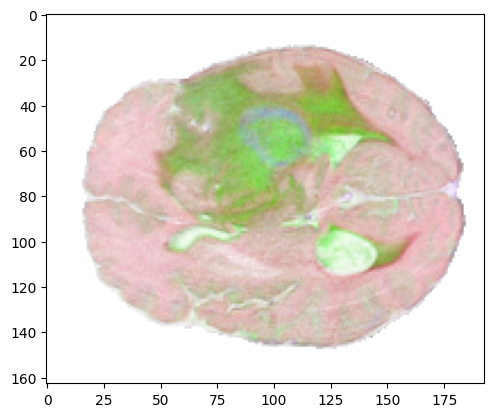

In [68]:
plt.imshow(image_4_exp_slice)
plt.show()

In [69]:
from sklearn.decomposition import PCA
import numpy as np

# Assume image is a 3D numpy array with shape (height, width, 4)
image = image_4_exp_slice

# Reshape the image to be a 2D array where each row is a pixel and each column is a channel
pixels = image.reshape(-1, 4)

# Perform PCA
pca = PCA(n_components=3)
transformed_pixels = pca.fit_transform(pixels)

# Reshape the transformed pixels back into the original image shape, but with 3 channels instead of 4
transformed_image = transformed_pixels.reshape(*image.shape[:2], 3)


In [70]:
# print eigen values
print(pca.explained_variance_)

[0.18579817 0.02857404 0.00650199]


In [71]:
# print weights in linear combinition
print(pca.components_)

[[ 0.63428797  0.47477169  0.25649434  0.5536075 ]
 [-0.68776259  0.56354601 -0.21463362  0.40414222]
 [ 0.09498855  0.67276651  0.09118946 -0.72804319]]


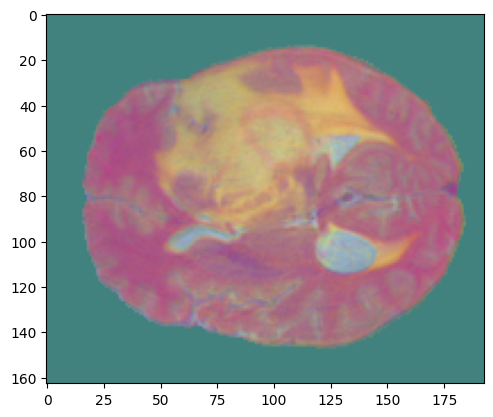

In [72]:
plt.imshow(transformed_image[:,:,:]/2+0.5)
plt.show()

In [73]:
pca_image = np.concatenate((transformed_image[:,:,0]/2+0.5, transformed_image[:,:,1]/2+0.5, transformed_image[:,:,2]/2+0.5), axis=1)
org_image = np.concatenate((image_4_exp_slice[:,:,0],image_4_exp_slice[:,:,1],image_4_exp_slice[:,:,2],image_4_exp_slice[:,:,3],), axis=1)

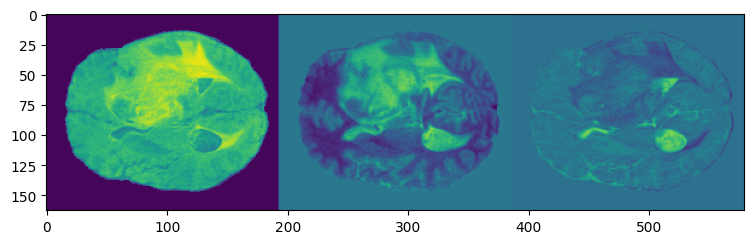

In [74]:
plt.figure(figsize=(9,3))
plt.imshow(pca_image)
plt.show()

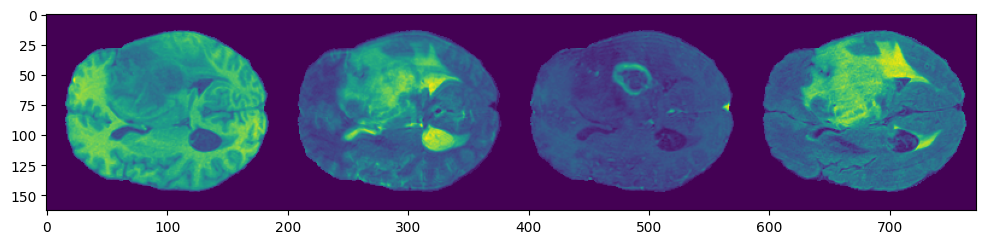

In [75]:
plt.figure(figsize=(12,3))
plt.imshow(org_image)
plt.show()

In [76]:
from sklearn.decomposition import PCA
import numpy as np

# Assume image is a 3D numpy array with shape (height, width, 4)
image = image_4_exp_slice[:,:,0:3].copy()
image[:,:,1] = image_4_exp_slice[:,:,3]

# Reshape the image to be a 2D array where each row is a pixel and each column is a channel
pixels = image.reshape(-1, 3)

# Perform PCA
pca = PCA(n_components=2)
transformed_pixels = pca.fit_transform(pixels)

# Reshape the transformed pixels back into the original image shape, but with 3 channels instead of 4
transformed_image = transformed_pixels.reshape(*image.shape[:2], 2)


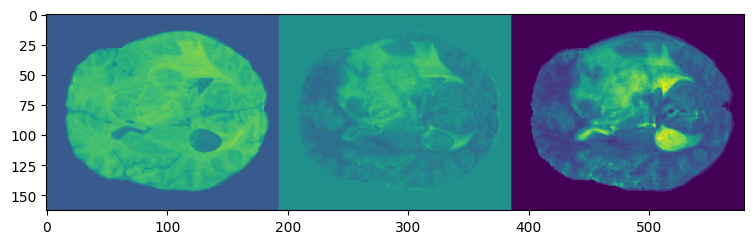

In [77]:
pca_image = np.concatenate((transformed_image[:,:,0]/2+0.5, transformed_image[:,:,1]/2+0.5, image_4_exp_slice[:,:,1]), axis=1)
plt.figure(figsize=(9,3))
plt.imshow(pca_image)
plt.show()